In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

In [66]:
# csv_file pathing
fertility_rate_path = "Resource/fred_fertility_rates.csv"
living_arrangements_path = "Resource/census_living_arrangements.csv"
living_arrangements_decade_path = "Resource/census_living_arrangements_by_decade.csv"
marital_status_path = "Resource/marital status overtime.csv"
age_fertility_path = "Resource/Age_Fertility.csv"
education_path = "Resource/Female Education Attainment Level.csv"

In [67]:
# Raw DataFrame Prep: Fertility Rates

# Read csv, drop na
fertility_rate_df = pd.read_csv(fertility_rate_path).dropna()

# Clean data
fertility_rate_df['DATE'] = pd.to_datetime(fertility_rate_df['DATE'].str.strip(), format='%d/%m/%Y').dt.year
fertility_rate_df.rename(columns = {'SPDYNTFRTINUSA':'fertility_rate','DATE':'Year'}, inplace = True) 

# Print and display
print(f'{len(fertility_rate_df)} records')
fertility_rate_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# fertility_rate_df.to_csv("Output/fertility_rate.csv", index=False, header=True)

59 records


Year  fertility_rate
0  1960           3.654
1  1961           3.620
2  1962           3.461
3  1963           3.319
4  1964           3.190

In [68]:
# Fertility Rate Trend over Time

# Variables to Compare
x_values = fertility_rate_df['Year']
y_values = fertility_rate_df['fertility_rate']

plt.plot(x_values, y_values, marker ='.', color = "black", label = 'Fertility Rate')
plt.title("U.S. Fertility Rate Trend (1960 thru 2019)")
plt.savefig('Output\FertilityRateTrendChart.png')


## Fertility Rate vs Living Arrangements

In [69]:
# Raw DataFrame Prep: Living Arrangements

# Read csv, drop na
living_arrangements_df = pd.read_csv(living_arrangements_path).dropna()

# Merge with fertility rates
merge_living_df = pd.merge(fertility_rate_df, living_arrangements_df, on = "Year", how = "outer").dropna()

# Add additional columns, format... 
other_ttl = merge_living_df['father_only'] + merge_living_df['other_relatives'] + merge_living_df['non_relatives']
merge_living_df['other']= other_ttl

pct_mother_only = (merge_living_df['mother_only'] / merge_living_df['under_18']).astype(float)
pct_two_parents = (merge_living_df['two_parents'] / merge_living_df['under_18']).astype(float)
pct_other = (merge_living_df['other'] / merge_living_df['under_18']).astype(float)

merge_living_df['pct_mother_only']= pct_mother_only.astype(float)
merge_living_df['pct_two_parents']= pct_two_parents.astype(float)
merge_living_df['pct_other']= pct_other.astype(float)
                                         
merge_living_df.head()

Year  fertility_rate  under_18  two_parents  mother_only  father_only  \
0   1960           3.654   63727.0      55877.0       5105.0        724.0   
8   1968           2.464   70326.0      60030.0       7556.0        776.0   
9   1969           2.456   70317.0      59857.0       7744.0        765.0   
10  1970           2.480   69162.0      58939.0       7452.0        748.0   
11  1971           2.266   70255.0      58606.0       8714.0        764.0   

    other_relatives  non_relatives   other  pct_mother_only  pct_two_parents  \
0            1601.0          420.0  2745.0         0.080107         0.876818   
8            1660.0          304.0  2740.0         0.107442         0.853596   
9            1602.0          349.0  2716.0         0.110130         0.851245   
10           1546.0          477.0  2771.0         0.107747         0.852188   
11           1707.0          464.0  2935.0         0.124034         0.834190   

    pct_other  
0    0.043074  
8    0.038961  
9    0.038625  
10   0.040065  
11   0.041776

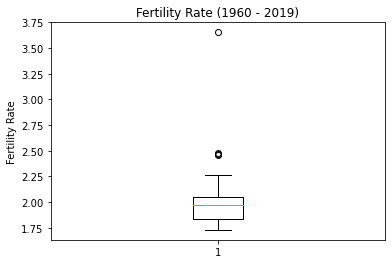

<Figure size 432x288 with 0 Axes>

In [70]:
# Living Arrangements Box Plot

fertility_rate = merge_living_df['fertility_rate']
fig1, ax1 = plt.subplots()
ax1.set_title('Fertility Rate (1960 - 2019)')
ax1.set_ylabel('Fertility Rate')
ax1.boxplot(fertility_rate)
plt.show()

plt.savefig('Output\Living_Arrangement_BoxPlot.png')

In [71]:
# Living Arrangements Scatter Chart (Population Set)

# Variables to Compare
x_values = merge_living_df['fertility_rate']
y_values = merge_living_df['pct_mother_only']

# Scatter Chart
plt.scatter(x_values, y_values, marker="o", facecolors="black", edgecolors="gray")

# Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "gray")
plt.annotate(line_eq,(1.75,.09),fontsize=10,color="black")

# Sample Population
sample_df = merge_living_df[-20:]

# Variables to Compare
x_values = sample_df['fertility_rate']
y_values = sample_df['pct_mother_only']

# Scatter Chart
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="gray")

# Labels and Display
plt.xlabel('Fertility Rate')
plt.ylabel('% Children Living with Mother only')
plt.show()

plt.savefig('Output\ScatterPlot_MotherOnlyLiving3.png')

# Correlation Coefficient
correlation = stats.pearsonr(x_values, y_values)
print(f"What is the correlation between fertility rate and % of Children under 18 living with their mother only?")
print(f"Their is a barely a correlation between fertility rate and children under 18 living with only their moms of {round(correlation[0],2)}.")
#print(f"This data is collected from 1960 thru 2019 however we only have 1 data point in the 1960's decade.")
#print(f"Data Source: US Census Bureau")

What is the correlation between fertility rate and % of Children under 18 living with their mother only?
Their is a barely a correlation between fertility rate and children under 18 living with only their moms of -0.17.


<Figure size 432x288 with 0 Axes>

In [72]:
# Calculate the population mean for Living Arrangements = Mother Only (entire population)
population = merge_living_df['pct_mother_only']
population_mean = population.mean()

# Calculate the population mean for Living Arrangements = Mother Only over last 20 years
sample_df = merge_living_df[-20:]
sample = sample_df['pct_mother_only']
sample_mean = sample.mean()

stats.ttest_1samp(sample, population_mean)

Ttest_1sampResult(statistic=24.26411898862151, pvalue=9.244269763354844e-16)

In [73]:
# Living Arrangements Bar Chart
x_values = merge_living_df['Year']
y_values = merge_living_df['pct_mother_only']

plt.bar(x_values, y_values, color='gray', alpha=0.5, align="center")
plt.plot(x_values, y_values, color = 'black')

plt.savefig('Output\MotherOnlyLiving_barchart.png')

In [74]:
# Raw DataFrame Prep: Female Education Attainment Level

# Read csv and drop na
education_df = pd.read_csv(education_path).dropna()

education_df

Year  Total # in thousands  Elementary 0-4 Middle School 5-8  \
0   1950                  44857           4417             15824   
1   1952                  45990           3608             15398   
2   1957                  49422           3951             14682   
3   1959                  50437           3559             14451   
4   1960                  51468           3781             15656   
..   ...                    ...            ...               ...   
57  2015                110,245          1,358             3,626   
58  2016                111,643          1,231             3,565   
59  2017                112,597          1,117             3,288   
60  2018                113,969          1,156             3,316   
61  2019                114,783          1,098             3,192   

   High School 1-3 High School 4 College 1-3 College 4  
0             7843         10114        3358      2264  
1             8180         12314        3550      2638  
2             8948         14602        3638      2813  
3             9194         15349        4087      2969  
4            10151         14267        4620      2991  
..             ...           ...         ...       ...  
57           7,408        31,578      30,253    36,021  
58           6,817        31,221      31,192    37,617  
59           6,799        31,216      31,185    38,991  
60           6,743        31,360      31,142    40,251  
61           6,580        31,002      30,902    42,009  

[62 rows x 8 columns]

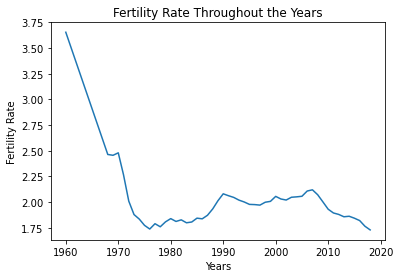

In [75]:
fertility_x = merge_living_df["Year"]
fertility_y = merge_living_df["fertility_rate"]

plt.xlabel("Years")
plt.ylabel("Fertility Rate")
plt.title("Fertility Rate Throughout the Years")
plt.plot(fertility_x, fertility_y)
plt.show()

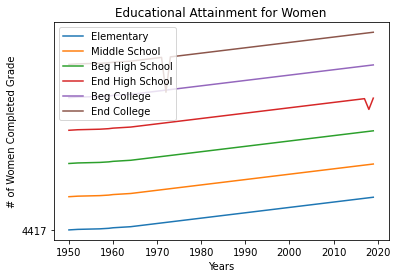

In [76]:
elementary_y = education_df["Elementary 0-4"]
elementary_x = education_df["Year"]

middle_school_y = education_df["Middle School 5-8"]
middle_school_x = education_df["Year"]

high_school_y = education_df["High School 1-3"]
high_school_x = education_df["Year"]

high_school_endy = education_df["High School 4"]
high_school_endx = education_df["Year"]

college_y = education_df["College 1-3"]
college_x = education_df["Year"]

college_endy = education_df["College 4"]
college_endx = education_df["Year"]

plt.plot(elementary_x, elementary_y, label="Elementary")
plt.plot(middle_school_x, middle_school_y, label="Middle School")
plt.plot(high_school_x, high_school_y, label="Beg High School")
plt.plot(high_school_endx, high_school_endy, label="End High School")
plt.plot(college_x, college_y, label="Beg College")
plt.plot(college_endx, college_endy, label="End College")
plt.yticks(np.arange(0, 5000, 10000))

plt.title("Educational Attainment for Women")
plt.xlabel("Years")
plt.ylabel("# of Women Completed Grade")
plt.legend(loc="upper left")
plt.show()



In [77]:
education_df[" Total # in thousands "] = education_df[" Total # in thousands "].astype(str).str.replace(',', '').astype(float)
education_df["Elementary 0-4"] = education_df["Elementary 0-4"].astype(str).str.replace(',', '').astype(float)
education_df["Middle School 5-8"] = education_df["Middle School 5-8"].astype(str).str.replace(',', '').astype(float)
education_df["High School 1-3"] = education_df["High School 1-3"].astype(str).str.replace(',', '').astype(float)
education_df["College 1-3"] = education_df["College 1-3"].astype(str).str.replace(',', '').astype(float)
education_df["College 4"] = education_df["College 4"].astype(str).str.replace(',', '').astype(float)


In [82]:
education_df[" Total # in thousands "] = pd.to_numeric(education_df[" Total # in thousands "], downcast="float")
education_df["Elementary 0-4"] = pd.to_numeric(education_df["Elementary 0-4"], downcast="float")
education_df["Middle School 5-8"] = pd.to_numeric(education_df["Middle School 5-8"], downcast="float")
education_df["High School 1-3"] = pd.to_numeric(education_df["High School 1-3"], downcast="float")
#education_df["High School 4"] = pd.to_numeric(education_df["High School 4"], downcast="float")
education_df["College 1-3"] = pd.to_numeric(education_df["College 1-3"], downcast="float")
education_df["College 4"] = pd.to_numeric(education_df["College 4"], downcast="float")



In [83]:
#Calculate Percentage of Education


#elementary_per = education_df["Elementary 0-4"]/education_df[" Total # in thousands "]
#middle_school_per = education_df["Middle School 5-8"]/education_df[" Total # in thousands "]
#highschool_beg_per = education_df["High School 1-3"]/education_df[" Total # in thousands "]
#highschool_end_per = education_df["High School 4"]/education_df[" Total # in thousands "]
#college_beg_per = education_df["College 1-3"]/education_df[" Total # in thousands "]
#college_end_per = education_df["College 4"]/education_df[" Total # in thousands "]

#Add Columns to DataFrame
#education_df["Percentage of Elementary Education"]=(elementary_per)
#education_df["Percentage of Middle Education"] =middle_school_per
#education_df["Percentage of  Beginning High School Education"]=high_school_beg_per
#education_df["Percentage of End High School Education"]=high_school_end_per
#education_df["Percentage of Beginning College Education"]=college_beg_per
#education_df["Percentage of End College Education"]=college_end_per


In [86]:
#Correlation of education
#correlation = stats.pearsonr(education_df["Elementary 0-4"], merge_living_df["fertility_rate"])

In [80]:
# Raw DataFrame Prep: Marital Status
# Read csv, drop na
marital_status_df = pd.read_csv(marital_status_path).dropna()

# Merge with fertility rates
merge_marital_df = pd.merge(fertility_rate_df, marital_status_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_marital_df)} records')
merge_marital_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
merge_marital_df.to_csv("Output/marital_status.csv", index=False, header=True)
merge_marital_df.head()


61 records


Year  fertility_rate Men Total Married Men Unmarried Men Total  \
0  1960           3.654    60,273      41,781              18,492   
1  1961           3.620       NaN         NaN                 NaN   
2  1962           3.461       NaN         NaN                 NaN   
3  1963           3.319       NaN         NaN                 NaN   
4  1964           3.190       NaN         NaN                 NaN   

  Never Married Men Widowed Men Divorced Men Women Total Married Women  \
0            15,274       2,112        1,106      64,607        42,583   
1               NaN         NaN          NaN         NaN           NaN   
2               NaN         NaN          NaN         NaN           NaN   
3               NaN         NaN          NaN         NaN           NaN   
4               NaN         NaN          NaN         NaN           NaN   

  Unmarried Women Total  Never Married Women Widowed Women Divorced Women  
0                 22,024              12,252         8,064          1,708  
1                    NaN                 NaN           NaN            NaN  
2                    NaN                 NaN           NaN            NaN  
3                    NaN                 NaN           NaN            NaN  
4                    NaN                 NaN           NaN            NaN

In [62]:
#drop Nan
clean_marital_df=merge_marital_df.dropna(how="any")
clean_marital_df.columns


Index(['Year', 'fertility_rate', 'Men Total', 'Married Men',
       'Unmarried Men Total', 'Never Married Men', 'Widowed Men',
       'Divorced Men', 'Women Total', 'Married Women',
       'Unmarried Women Total ', 'Never Married Women', 'Widowed Women',
       'Divorced Women'],
      dtype='object')

In [63]:
#get rid of warning
import warnings
warnings.filterwarnings('ignore')

#change column value
clean_marital_df['Men Total'] = clean_marital_df['Men Total'].str.replace(',', '').astype(float)
clean_marital_df['Married Men'] = clean_marital_df['Married Men'].str.replace(',', '').astype(float)
clean_marital_df['Unmarried Men Total'] = clean_marital_df['Unmarried Men Total'].str.replace(',', '').astype(float)
clean_marital_df['Never Married Men'] = clean_marital_df['Never Married Men'].str.replace(',', '').astype(float)
clean_marital_df['Widowed Men'] = clean_marital_df['Widowed Men'].str.replace(',', '').astype(float)
clean_marital_df['Divorced Men'] = clean_marital_df['Divorced Men'].str.replace(',', '').astype(float)
clean_marital_df['Women Total'] = clean_marital_df['Women Total'].str.replace(',', '').astype(float)
clean_marital_df['Married Women'] = clean_marital_df['Married Women'].str.replace(',', '').astype(float)
clean_marital_df['Unmarried Women Total '] = clean_marital_df['Unmarried Women Total '].str.replace(',', '').astype(float)
clean_marital_df['Never Married Women'] = clean_marital_df['Never Married Women'].str.replace(',', '').astype(float)
clean_marital_df['Widowed Women'] = clean_marital_df['Widowed Women'].str.replace(',', '').astype(float)
clean_marital_df['Divorced Women'] = clean_marital_df['Divorced Women'].str.replace(',', '').astype(float)
clean_marital_df.dtypes


Year                        int64
fertility_rate            float64
Men Total                 float64
Married Men               float64
Unmarried Men Total       float64
Never Married Men         float64
Widowed Men               float64
Divorced Men              float64
Women Total               float64
Married Women             float64
Unmarried Women Total     float64
Never Married Women       float64
Widowed Women             float64
Divorced Women            float64
dtype: object

In [19]:
#caculate percentage
#men
married_men_per=clean_marital_df['Married Men']/clean_marital_df['Men Total']
unm_men_per=clean_marital_df['Unmarried Men Total']/clean_marital_df['Men Total']
never_mar_mp=clean_marital_df['Never Married Men']/clean_marital_df['Men Total']
#women
married_wm_per=clean_marital_df['Married Women']/clean_marital_df['Women Total']
unm_wm_per=clean_marital_df['Unmarried Women Total ']/clean_marital_df['Women Total']
never_mar_wp=clean_marital_df['Never Married Women']/clean_marital_df['Women Total']
#total
total_p=clean_marital_df['Men Total']+clean_marital_df['Women Total']
total_married=clean_marital_df['Married Men']+clean_marital_df['Married Women']
total_unm=clean_marital_df['Unmarried Men Total']+clean_marital_df['Never Married Women']
total_never=clean_marital_df['Never Married Men']+clean_marital_df['Never Married Women']
married_per=total_married/total_p
unmarried_per=total_unm/total_p
never_per=total_never/total_p
#add column to df
clean_marital_df["Per of married men"]=married_men_per
clean_marital_df["Per of unmarried men"]=unm_men_per
clean_marital_df["Per of Never married men"]=never_mar_mp
clean_marital_df["Per of married women"]=married_wm_per
clean_marital_df["Per of unmarried women"]=unm_wm_per
clean_marital_df["Per of Never married women"]=never_mar_wp
clean_marital_df["Per of married peole"]=married_per
clean_marital_df["Per of unmarried peole"]=unmarried_per
clean_marital_df["Per of Never married peole"]=never_per
clean_marital_df.head()


Year  fertility_rate  Men Total  Married Men  Unmarried Men Total  \
0   1960          3.6540    60273.0      41781.0              18492.0   
10  1970          2.4800    70559.0      47109.0              23450.0   
20  1980          1.8395    81947.0      51813.0              30134.0   
30  1990          2.0810    91955.0      55833.0              36121.0   
33  1993          2.0195    94854.0      56833.0              38021.0   

    Never Married Men  Widowed Men  Divorced Men  Women Total  Married Women  \
0             15274.0       2112.0        1106.0      64607.0        42583.0   
10            19832.0       2051.0        1567.0      77766.0        48148.0   
20            24227.0       1977.0        3930.0      89914.0        52965.0   
30            27505.0       2333.0        6283.0      99838.0        56797.0   
33            28775.0       2468.0        6778.0     102400.0        57768.0   

    ...  Divorced Women  Per of married men  Per of unmarried men  \
0   ...          1708.0            0.693196              0.306804   
10  ...          2717.0            0.667654              0.332346   
20  ...          5966.0            0.632275              0.367725   
30  ...          8845.0            0.607177              0.392812   
33  ...          9883.0            0.599163              0.400837   

    Per of Never married men  Per of married women  Per of unmarried women  \
0                   0.253414              0.659108                0.340892   
10                  0.281070              0.619139                0.380861   
20                  0.295642              0.589063                0.410948   
30                  0.299114              0.568892                0.431098   
33                  0.303361              0.564141                0.435850   

    Per of Never married women  Per of married peole  Per of unmarried peole  \
0                     0.189639              0.675561                0.246188   
10                    0.220752              0.642218                0.273838   
20                    0.224948              0.609667                0.293028   
30                    0.227549              0.587248                0.306784   
33                    0.229824              0.580982                0.312060   

    Per of Never married peole  
0                     0.220420  
10                    0.249445  
20                    0.258657  
30                    0.261860  
33                    0.265186  

[5 rows x 23 columns]

In [20]:
#correlation between married and never married
correlation = stats.pearsonr(married_per,never_per)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is -0.96


In [21]:
#correlation between married and unmarried
correlation = stats.pearsonr(married_per,unmarried_per)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is -0.99


In [22]:
#correlation between married and unmarried
correlation = stats.pearsonr(married_per,unmarried_per)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is -0.99


The variables “Married” and "unmarried" are not independent variables. They indicate the same thing.

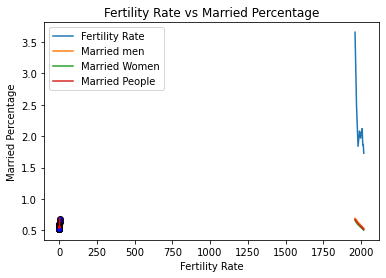

The correlation between both factors is 0.8


<Figure size 432x288 with 0 Axes>

In [23]:
#line chart compared married percentage vs fertility rate
x_axis_data = clean_marital_df['Year']
fertility_rate = clean_marital_df["fertility_rate"]
y_axis1 = fertility_rate
y_axis2 = clean_marital_df['Per of married men']
y_axis3 = clean_marital_df['Per of married women']
y_axis4=clean_marital_df["Per of married peole"]

plt.plot(x_axis_data, y_axis1,label="Fertility Rate")
plt.plot(x_axis_data, y_axis2,label="Married men")
plt.plot(x_axis_data, y_axis3,label="Married Women")
plt.plot(x_axis_data,y_axis4,label="Married People")
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Fertility Rate/Married Per')
plt.title('Fertility Rate vs Married Percentage')
#save fig
plt.savefig("Output/fertility_married_line.png")


#scatter plot fertility rate vs married people
plt.scatter(fertility_rate, married_per, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Fertility Rate')
plt.ylabel('Married Percentage')

#regression
model = stats.linregress(fertility_rate, married_per)
y_value=fertility_rate*model[0]+model[1]
plt.plot(fertility_rate,y_value,color="red")
plt.show()

#correlation
correlation = stats.pearsonr(fertility_rate,married_per)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save fig
plt.savefig("Output/fertility_married_scatter.png")


Based on correlation and linear regression. The trend will be the less people get married, the less fertility rate tends to be

In [24]:
#t test between fertility rate and married
feritility_rate=clean_marital_df['fertility_rate']
stats.ttest_ind(feritility_rate,married_per,equal_var=False)


Ttest_indResult(statistic=24.06107693828698, pvalue=5.3124305780152914e-21)

In [25]:
#married_per_mean
married_mean=clean_marital_df["Per of married peole"].mean()
married_mean
sample1=clean_marital_df[clean_marital_df["Per of married peole"]<married_mean]
sample2=clean_marital_df[clean_marital_df["Per of married peole"]>married_mean]


In [26]:
#t test married sample
stats.ttest_ind(sample1['fertility_rate'],sample2['fertility_rate'],equal_var=False)


Ttest_indResult(statistic=-1.611260716424141, pvalue=0.13066609612768532)

In [27]:
#never_married_per_mean
never_married_per_mean=clean_marital_df["Per of Never married peole"].mean()
never_married_per_mean
sample3=clean_marital_df[clean_marital_df["Per of Never married peole"]<never_married_per_mean]
sample4=clean_marital_df[clean_marital_df["Per of Never married peole"]>never_married_per_mean]


In [28]:
#t test never married sample
stats.ttest_ind(sample3['fertility_rate'],sample4['fertility_rate'],equal_var=False)


Ttest_indResult(statistic=1.7898790391981323, pvalue=0.09205293731924707)

In [29]:
#unmarried_per_mean
unmarried_mean=clean_marital_df["Per of unmarried peole"].mean()
unmarried_mean
sample5=clean_marital_df[clean_marital_df["Per of unmarried peole"]<unmarried_mean]
sample6=clean_marital_df[clean_marital_df["Per of unmarried peole"]>unmarried_mean]


In [30]:
#t test unmarried sample
stats.ttest_ind(sample5['fertility_rate'],sample6['fertility_rate'],equal_var=False)


Ttest_indResult(statistic=1.7898790391981323, pvalue=0.09205293731924707)

It does not make sense that data has high correlation and high p value at same time

In [29]:
#the data is not continous, drop 1960，1970，1980
twod_df=clean_marital_df[((clean_marital_df["Year"] != 1960) &( clean_marital_df["Year"] != 1970) & (clean_marital_df["Year"] != 1980))]
twod_df.head()


Year  fertility_rate  Men Total  Married Men  Unmarried Men Total  \
30  1990          2.0810    91955.0      55833.0              36121.0   
33  1993          2.0195    94854.0      56833.0              38021.0   
34  1994          2.0015    96768.0      57068.0              39700.0   
35  1995          1.9780    97704.0      57570.0              39953.0   
36  1996          1.9760    98593.0      57656.0              40937.0   

    Never Married Men  Widowed Men  Divorced Men  Women Total  Married Women  \
30            27505.0       2333.0        6283.0      99838.0        56797.0   
33            28775.0       2468.0        6778.0     102400.0        57768.0   
34            30228.0       2222.0        7250.0     104032.0        58185.0   
35            30286.0       2284.0        7383.0     105028.0        58984.0   
36            30691.0       2478.0        7768.0     106031.0        58905.0   

    ...  Divorced Women  Per of married men  Per of unmarried men  \
30  ...          8845.0            0.607177              0.392812   
33  ...          9883.0            0.599163              0.400837   
34  ...         10129.0            0.589740              0.410260   
35  ...         10270.0            0.589229              0.408919   
36  ...         10521.0            0.584788              0.415212   

    Per of Never married men  Per of married women  Per of unmarried women  \
30                  0.299114              0.568892                0.431098   
33                  0.303361              0.564141                0.435850   
34                  0.312376              0.559299                0.440701   
35                  0.309977              0.561603                0.438407   
36                  0.311290              0.555545                0.444464   

    Per of Never married women  Per of married peole  Per of unmarried peole  \
30                    0.227549              0.587248                0.306784   
33                    0.229824              0.580982                0.312060   
34                    0.236898              0.573969                0.320443   
35                    0.235109              0.574917                0.318874   
36                    0.240760              0.569635                0.324815   

    Per of Never married peole  
30                    0.261860  
33                    0.265186  
34                    0.273272  
35                    0.271191  
36                    0.274743  

[5 rows x 23 columns]

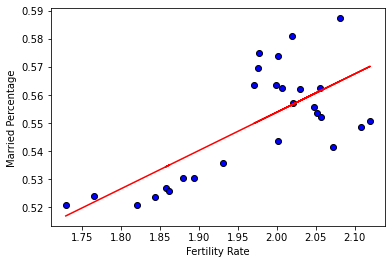

The correlation between both factors is 0.72


<Figure size 432x288 with 0 Axes>

In [30]:
#find out correlation based on continuous dataset
#scatter plot fertility rate vs married people
fertility_rate1=twod_df["fertility_rate"]
married_per1=twod_df["Per of married peole"]
plt.scatter(fertility_rate1, married_per1, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Fertility Rate')
plt.ylabel('Married Percentage')

#regression
model = stats.linregress(fertility_rate1, married_per1)
y_value=fertility_rate1*model[0]+model[1]
plt.plot(fertility_rate1,y_value,color="red")
plt.show()

#correlation
correlation = stats.pearsonr(fertility_rate1, married_per1)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save fig
plt.savefig("Output/fertility_married_scatter.png")


In [31]:
#t test
td_married_mean=twod_df["Per of married peole"].mean()
sample7=twod_df[twod_df["Per of married peole"]<td_married_mean]
sample8=twod_df[twod_df["Per of married peole"]>td_married_mean]
stats.ttest_ind(sample7['fertility_rate'],sample8['fertility_rate'],equal_var=False)


Ttest_indResult(statistic=-3.751815439620867, pvalue=0.002319278215920306)

In [32]:
# Raw DataFrame Prep: Fertility by Age
# Read csv
age_fertility_df = pd.read_csv(age_fertility_path)
# Clean
age_fertility_df = age_fertility_df[['Year', 'Age 10-14 Years', 'Age 15-19 Years', 'Age 20-24 Years',
                           'Age 25-29 Years', 'Age 30-34 Years', 'Age 35-39 Years', 'Age 40-44 Years', 'Age 45-49 Years']]
# Merge with fertility rates
merge_age_df = pd.merge(fertility_rate_df, age_fertility_df, on="Year", how="outer")
# Print and display
print(f'{len(merge_age_df)} records')
#Summing up age groups and storing into variable
ages_15_30 = merge_age_df["Age 15-19 Years"] + merge_age_df["Age 20-24 Years"] + merge_age_df["Age 25-29 Years"] + merge_age_df["Age 30-34 Years"]
ages_35_49 = merge_age_df['Age 35-39 Years'] + merge_age_df["Age 40-44 Years"] + merge_age_df["Age 45-49 Years"]
new_merge = merge_age_df.dropna()
new_merge['35 +'] = ages_35_49
new_merge['34 and below'] = ages_15_30
below_34 = new_merge['34 and below']
new_table = new_merge[['Year','fertility_rate', '35 +', '34 and below']]
new_table
x_axis = np.arange(len(new_table))
tick_locations = [value+0.6 for value in x_axis]
plt.figure(figsize=(20, 3))
plt.bar(x_axis, new_table['35 +'], color='r', alpha=0.5, align='edge')
plt.xticks(tick_locations, round(new_table['Year']), rotation='vertical')
plt.title("Fertility rate from 1960-2018, 35 and older")
plt.xlabel('Year')
plt.ylabel('Sum of 35 and olde fertility rate for that year')
plt.savefig
plt.show()

73 records
